# Edge Detection & Gradient Filters

In this notebook we explore **how edges are detected in images**, starting from simple derivatives to advanced filters.  
We will learn about:
- Image gradients (horizontal, vertical, magnitude, orientation)
- Filters like Roberts, Prewitt, Sobel, and Laplacian
- Canny edge detection pipeline
- Gaussian derivatives, Laplacian of Gaussian (LoG), and Difference of Gaussian (DoG)
- How these ideas connect to feature detection methods like **SIFT**


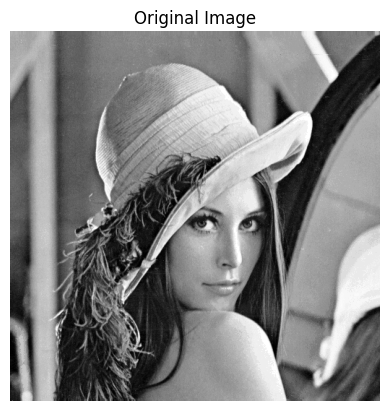

In [10]:
# import libraries and load images

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread(r"E:\team tasks\SkyXperts SW team\2025 - 2026 season\VisionCourse2023-master\VisionCourse2023-master\tasks solved\Images\lenna.bmp", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()


### Gradients and Derivatives

- An image can be thought of as a 2D function `I(x, y)`.  
- The **gradient** measures changes in intensity:  
  - ∂I/∂x → detects vertical edges (changes along x)  
  - ∂I/∂y → detects horizontal edges (changes along y)  
- Combining them gives the **gradient magnitude**:  
mag = sqrt((∂I/∂x)² + (∂I/∂y)²)

- The **orientation** is:  
θ = arctan(∂I/∂y / ∂I/∂x)


**Visualization idea:**  
For example:  
![load](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_gradients_neg_135_degrees.png?lossy=2&strip=1&webp=1)


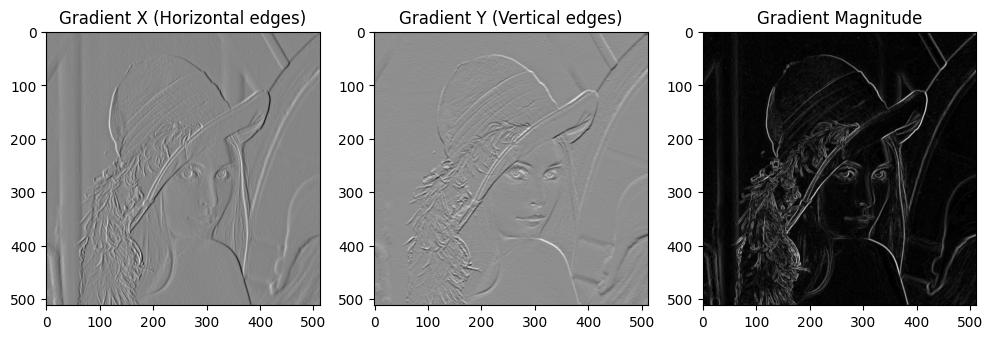

In [11]:
# Compute gradients with Sobel
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # horizontal derivative
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # vertical derivative

# Magnitude and orientation
magnitude = np.sqrt(grad_x**2 + grad_y**2)
orientation = np.arctan2(grad_y, grad_x) * 180 / np.pi

plt.figure(figsize=(12,5))
plt.subplot(1,3,1); plt.imshow(grad_x, cmap="gray"); plt.title("Gradient X (Horizontal edges)")
plt.subplot(1,3,2); plt.imshow(grad_y, cmap="gray"); plt.title("Gradient Y (Vertical edges)")
plt.subplot(1,3,3); plt.imshow(magnitude, cmap="gray"); plt.title("Gradient Magnitude")
plt.show()


another example for difference between x and y gradients for edges 

![load](https://docs.opencv.org/4.x/gradients.jpg)

### Laplacian

- The **Laplacian** is the second derivative of the image:  
∇²I = ∂²I/∂x² + ∂²I/∂y²
- It detects regions of **rapid intensity change** (edges).  
- Unlike gradients, it does not provide orientation, only edge locations.  
- Edges appear at **zero-crossings** in the Laplacian.

**Visualization idea:**  
![](https://ars.els-cdn.com/content/image/3-s2.0-B9780123744579000196-f19-07.jpg)

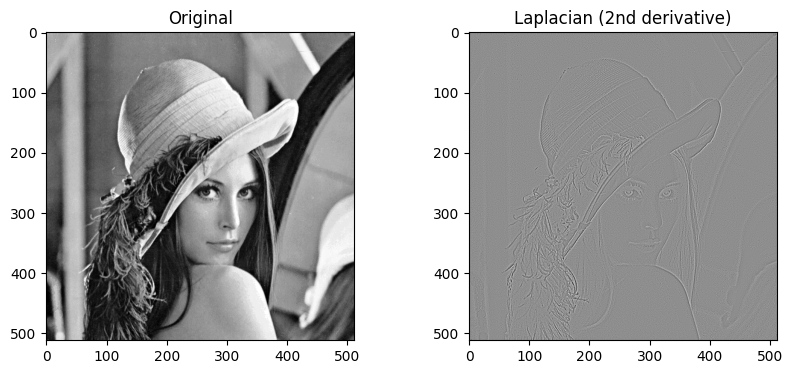

In [12]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(laplacian, cmap="gray"); plt.title("Laplacian (2nd derivative)")
plt.show()


- Note: Laplacian finds edges at zero-crossings but doesn’t give orientation.

### Canny Edge Detection

Canny is a multi-stage pipeline:
1. **Noise reduction** – apply Gaussian blur to smooth image.  
2. **Gradient calculation** – compute intensity gradients.  
3. **Non-maximum suppression** – thin edges to 1-pixel lines.  
4. **Double thresholding** – classify strong vs. weak edges.  
5. **Edge tracking by hysteresis** – connect weak edges if linked to strong ones.

**Visualization idea:**  
gaussian filter * image idea for derivative of gaussian: 
![](https://miro.medium.com/v2/resize:fit:2000/1*2roG-Ul5AfTD3riXE-aCKA.png)

<hr>
Canny edge detection pipeline
  
![](https://www.researchgate.net/profile/Sumeyya-Ilkin/publication/323994199/figure/fig2/AS:11431281196122802@1696552852378/the-process-steps-of-the-implemented-Canny-edge-detection-algorithm.png)


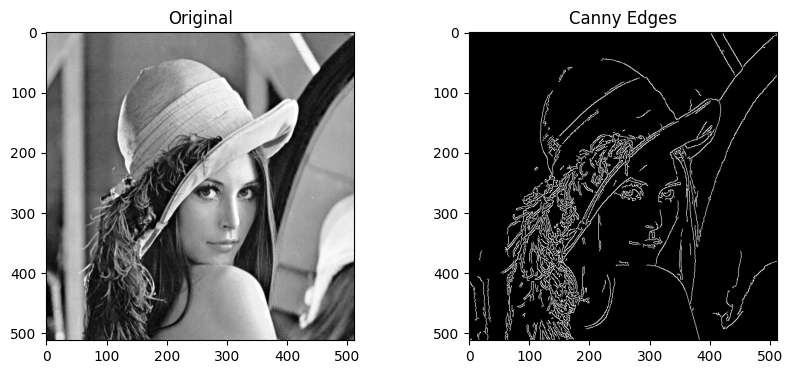

In [13]:
edges = cv2.Canny(img, 100, 200)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(edges, cmap="gray"); plt.title("Canny Edges")
plt.show()


### Classical Filters

- **Roberts Cross**:  
  Uses 2×2 kernels, very sensitive to noise, detects diagonal edges.
  
- **Prewitt**:  
  Uses 3×3 kernels, better noise robustness, detects horizontal/vertical edges.

- **Sobel**:  
  Similar to Prewitt but gives more weight to central pixels.  
  Can be extended to larger kernels (e.g., 5×5).

**Visualization idea:**  
![](https://www.researchgate.net/publication/337153674/figure/fig1/AS:823692309319681@1573394958986/Fig-1-Horizontal-Vertical-Masks-for-Classical-Operators-Robert-operator--having.jpg)  
- Roberts: [[1,0],[0,-1]]  
- Prewitt (X): [[-1,0,1],[-1,0,1],[-1,0,1]]  
- Sobel (X): [[-1,0,1],[-2,0,2],[-1,0,1]]

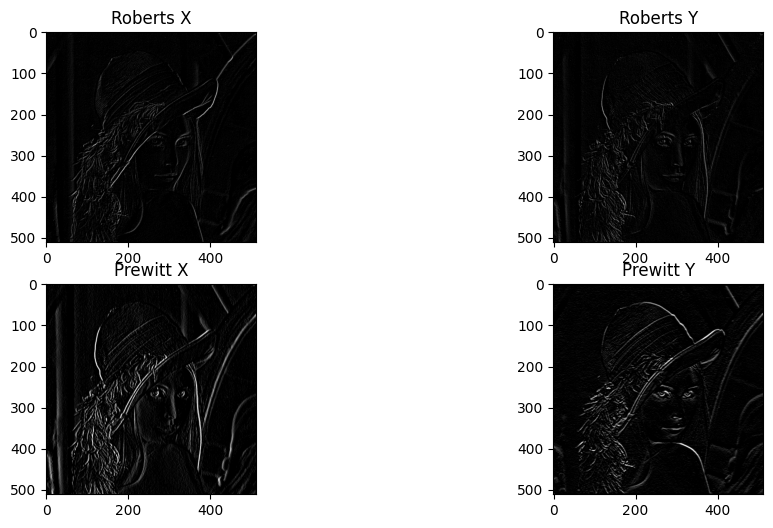

In [14]:
# Define small convolution kernels
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

sobel_3x3x = cv2.getDerivKernels(1, 0, 3)[0]
sobel_3x3y = cv2.getDerivKernels(0, 1, 3)[0]

# Apply with cv2.filter2D
rob_x = cv2.filter2D(img, -1, roberts_x)
rob_y = cv2.filter2D(img, -1, roberts_y)
pre_x = cv2.filter2D(img, -1, prewitt_x)
pre_y = cv2.filter2D(img, -1, prewitt_y)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1); plt.imshow(rob_x, cmap="gray"); plt.title("Roberts X")
plt.subplot(2,2,2); plt.imshow(rob_y, cmap="gray"); plt.title("Roberts Y")
plt.subplot(2,2,3); plt.imshow(pre_x, cmap="gray"); plt.title("Prewitt X")
plt.subplot(2,2,4); plt.imshow(pre_y, cmap="gray"); plt.title("Prewitt Y")
plt.show()


### Sobel 3×3 vs 5×5

- **3×3 Sobel** detects finer edges, more sensitive to noise.  
- **5×5 Sobel** is smoother, less sensitive to noise, but edges may look thicker.  

This demonstrates how filter size is a trade-off between **detail** and **robustness**.


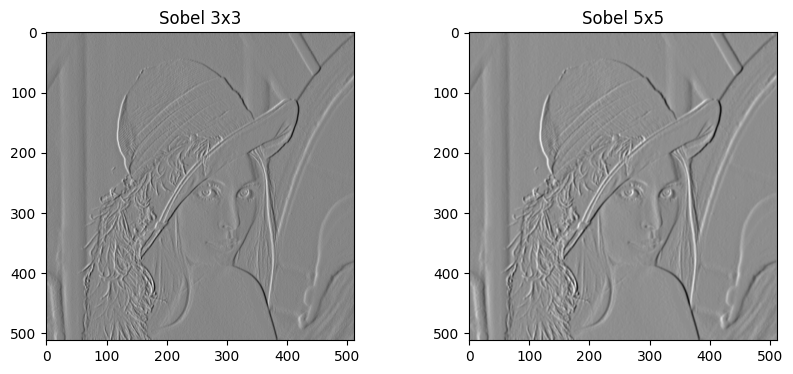

In [15]:
sobel3 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel5 = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(sobel3, cmap="gray"); plt.title("Sobel 3x3")
plt.subplot(1,2,2); plt.imshow(sobel5, cmap="gray"); plt.title("Sobel 5x5")
plt.show()


### Derivative of Gaussian (DoG) & Laplacian of Gaussian (LoG)

- Smoothing with Gaussian before differentiation reduces noise sensitivity.  
- **DoG (Difference of Gaussians):**  
  - Approximation of LoG.  
  - Subtract two blurred images with different sigmas.  
  - Faster to compute.
- **LoG (Laplacian of Gaussian):**  
  - Apply Laplacian after Gaussian smoothing.  
  - Detects edges at zero-crossings.

**Connection to SIFT:**  
- SIFT uses DoG to detect **blobs** (scale-invariant keypoints).  
- Then assigns orientation & builds descriptors.

**Visualization idea:**  
![](https://www.researchgate.net/publication/320837258/figure/fig10/AS:959194584854528@1605701218063/1D-difference-of-Gaussians-DoG-function.jpg)


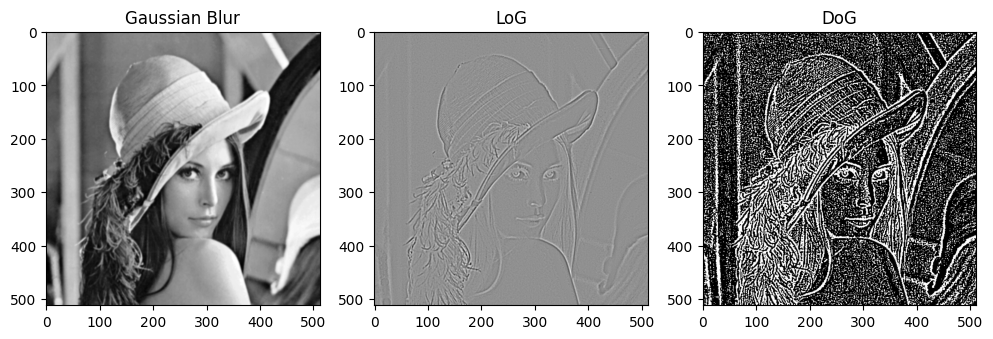

In [16]:
# Gaussian smoothing
blur = cv2.GaussianBlur(img, (5,5), 1)

# Laplacian of Gaussian (LoG)
log = cv2.Laplacian(blur, cv2.CV_64F)

# Difference of Gaussians (DoG)
blur1 = cv2.GaussianBlur(img, (5,5), 1)
blur2 = cv2.GaussianBlur(img, (5,5), 2)
dog = blur1 - blur2

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(blur, cmap="gray"); plt.title("Gaussian Blur")
plt.subplot(1,3,2); plt.imshow(log, cmap="gray"); plt.title("LoG")
plt.subplot(1,3,3); plt.imshow(dog, cmap="gray"); plt.title("DoG")
plt.show()


- DoG is pretty close to LOG but needs less processing (less complex)
- DOG is what SIFT uses for blob detection.  

![](https://www.researchgate.net/publication/241639414/figure/fig1/AS:670705813295106@1536920135145/Gaussian-pyramid-and-difference-of-Gaussian-DoG-pyramid-There-are-three-octaves-each.jpg)

but that is for another day